In [63]:
# Display page w/ 90% margins
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Pollution in Cities (SO2, NO2)

### Import dependencies

In [1]:
# Reading data
import pandas as pd
# Plotting data 
import matplotlib.pyplot as plt
# Plotting data 
import seaborn as sns

### Read data to dataframe

In [5]:
# Read data to dataframe
pollution = pd.read_csv('C:\\Users\\Robert.Jones\\Documents\\Python_Projects\\data_visualization\\pollution_data\\pollution_data_city.csv')

### Brief data exploration

In [242]:
# Print first 5 rows
pollution.head(5)

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [243]:
# Print schema
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8888 non-null   object 
 1   year    8888 non-null   int64  
 2   month   8888 non-null   int64  
 3   day     8888 non-null   int64  
 4   CO      8888 non-null   float64
 5   NO2     8888 non-null   float64
 6   O3      8888 non-null   float64
 7   SO2     8888 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 555.6+ KB


## Highlighting data in Houston

### Highlight a certain date

Text(4759    45.1
Name: NO2, dtype: float64, 4759    21.675
Name: SO2, dtype: float64, '11/26/2014')

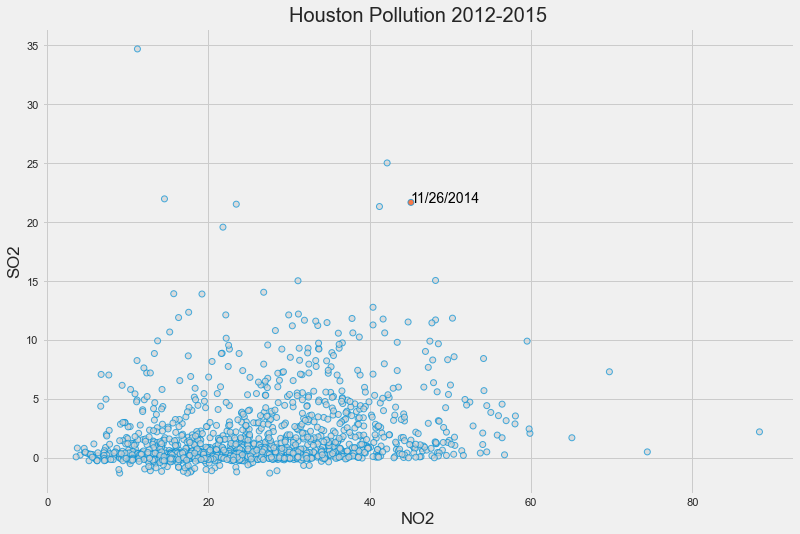

In [244]:
# Highlighting 11/26/2014 in Houston, Texas

# Set aesthetic 
plt.style.use('fivethirtyeight')

# Return all rows where the city is equal to Houston
houston_pollution = pollution[pollution.city == 'Houston']

# ... use a list comprehension to find date and color the point orange
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]
# ... and plot it
sns.regplot(x = 'NO2', y='SO2',data = houston_pollution, fit_reg = False, scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.title("Houston Pollution 2012-2015",fontsize = 20)

# Add text annotations

# ... Find a specific date (for example...day = 330 and year = 2014)
day = houston_pollution[houston_pollution.day == 330]
year = day[day.year == 2014]
# ... x-value
NO2 = year.NO2
# ... y-value
SO2 = year.SO2

# ... annotation the date
plt.text(NO2, SO2, "11/26/2014", horizontalalignment='left', size='medium', color='black')


### Highlight maximums

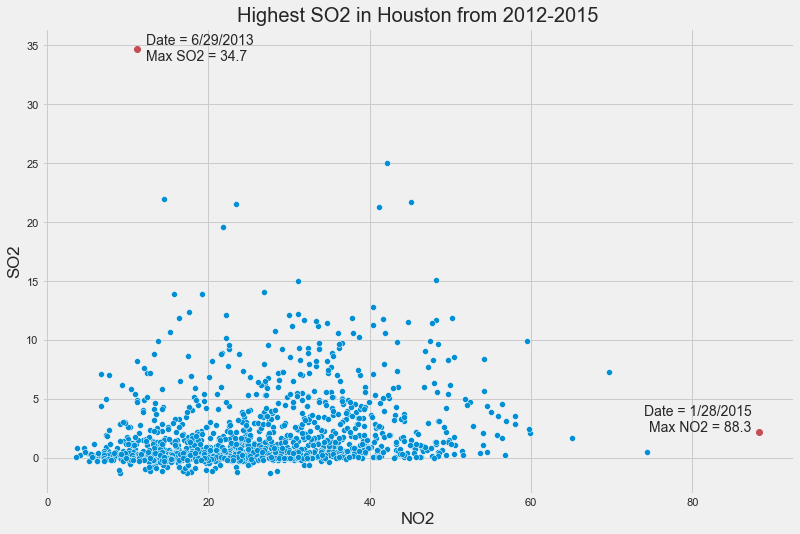

In [245]:
# Highlighting Max SO2

# Set aesthetic 
plt.style.use('fivethirtyeight')

# Make a copy of houston_pollution
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find and Highlight Maximum SO2 and NO2

# ...set title 
plt.title("Highest SO2 in Houston from 2012-2015",fontsize = 20)

# ...find max SO2
max_SO2 = houston_pollution.SO2.max()
# ...with new column "point_type", find highest SO2 day
houston_pollution['point_type'] = ['Highest SO2 Day' if SO2  ==  max_SO2 else 'Others' for SO2 in houston_pollution.SO2]


# ...find max SO2
max_NO2 = houston_pollution.NO2.max()
# ...with new column "point_type", find highest NO2 day
houston_pollution['point_type'] = ['Highest NO2 Day' if NO2  ==  max_NO2 else 'Others' for NO2 in houston_pollution.NO2]

# ...plot it
sns.scatterplot(x = 'NO2',y = 'SO2',data = houston_pollution)

# find date for max SO2 reading
max_SO2_date = houston_pollution[houston_pollution.SO2 == max_SO2].year
max_SO2_date_2 = houston_pollution[houston_pollution.SO2 == max_SO2].month
max_SO2_date_3 = houston_pollution[houston_pollution.SO2 == max_SO2].day
# print(max_SO2_date,max_SO2_date_2,max_SO2_date_3) = 6/29/2013

# find date for max NO2 reading
max_NO2_date = houston_pollution[houston_pollution.NO2 == max_NO2].year
max_NO2_date_2 = houston_pollution[houston_pollution.NO2 == max_NO2].month
max_NO2_date_3 = houston_pollution[houston_pollution.NO2 == max_NO2].day
# print(max_NO2_date,max_NO2_date_2,max_NO2_date_3) = 1/28/2015


# ... annotate and highlight max SO2
max_SO2_NO2 = houston_pollution[houston_pollution.SO2 == max_SO2]
plt.text(max_SO2_NO2.NO2 + 1, max_SO2 -1,f"Date = 6/29/2013 \nMax SO2 = {max_SO2}")
plt.plot(max_SO2_NO2.NO2,max_SO2,"ro")


# ... annotate and highlight max NO2
max_NO2_SO2 = houston_pollution[houston_pollution.NO2 == max_NO2]
plt.text(max_NO2 - 1,max_NO2_SO2.SO2, f"Date = 1/28/2015\nMax NO2 = {max_NO2}",horizontalalignment='right')
plt.plot(max_NO2,max_NO2_SO2.SO2,"ro")

## Visualizing with Kernal Dentisty Estimation Plots (KDEs)

### KDE for Ozone (O3)

Text(0.5, 1.0, 'Ozone in 2012')

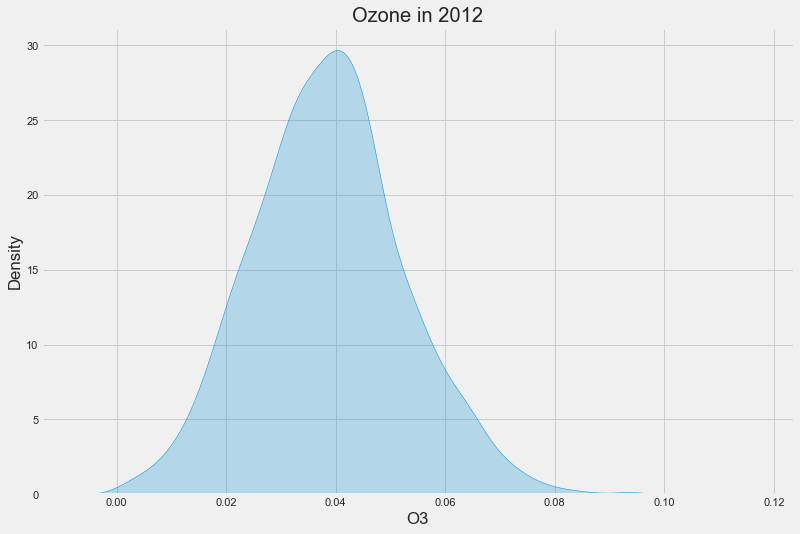

In [246]:
# Lets look at pollution O3 (ozone) in the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3,shade = True, label = '2012')

# Set title
plt.title("Ozone in 2012")

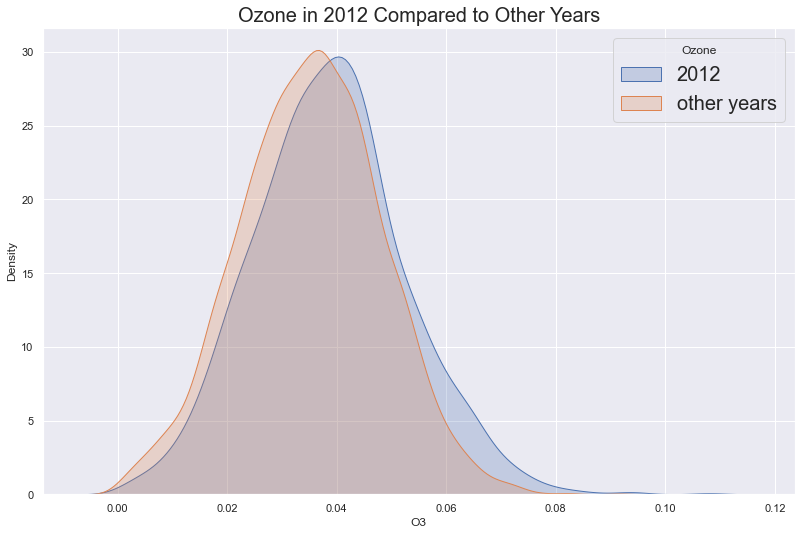

In [247]:
# Set size for readability
sns.set(rc = {'figure.figsize':(12,8)})

# Add O3 in 2012
sns.kdeplot(pollution[pollution.year == 2012].O3,shade = True, label = '2012')
# ... and compare to O3 outside of 2012
sns.kdeplot(pollution[pollution.year != 2012].O3,shade=True,label='other years')

# Set title
plt.title("Ozone in 2012 Compared to Other Years",fontsize = 20)

# Set legend
plt.legend(title="Ozone",loc="upper right",labels=['2012','other years'],fontsize = 20)

### Ozone Rug Plot

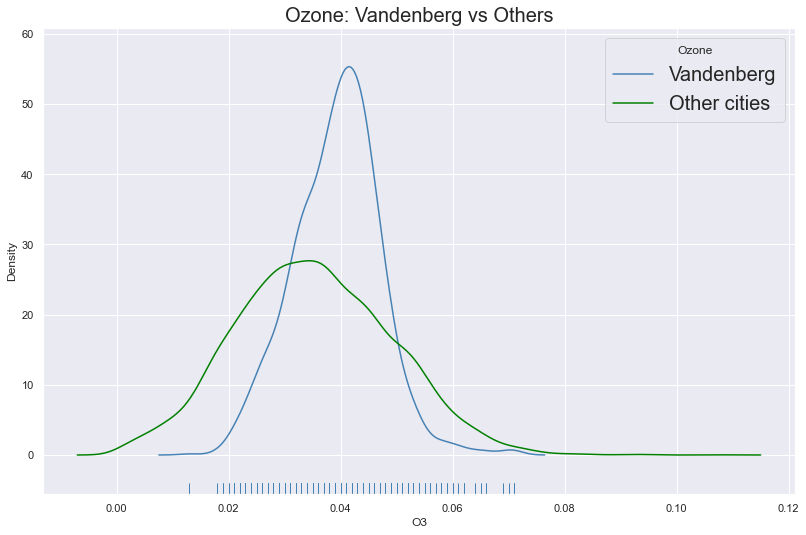

In [248]:
# Plot O3 at Vandenberg Air Force Base

# ...rugplot
sns.rugplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, label = '_Hidden', color = 'steelblue')
# ...distribution plot
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, label = 'Vandenberg', color = 'steelblue',hist=False)


# Plot O3 for anything outside of Vandenberg Air Force Base
sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3,label = 'Other cities',color = 'green',hist=False)

# Set Title, Axes Labels, Legend
plt.title("Ozone: Vandenberg vs Others",fontsize = 20)
plt.ylabel("Density")
plt.legend(title="Ozone",loc="upper right",prop={'size':20})


# ignore warning about distplot being depreciated 
import warnings
warnings.filterwarnings('ignore')

### Ozone Beeswarm Plot

Text(0.5, 1.0, 'March Ozone levels by city')

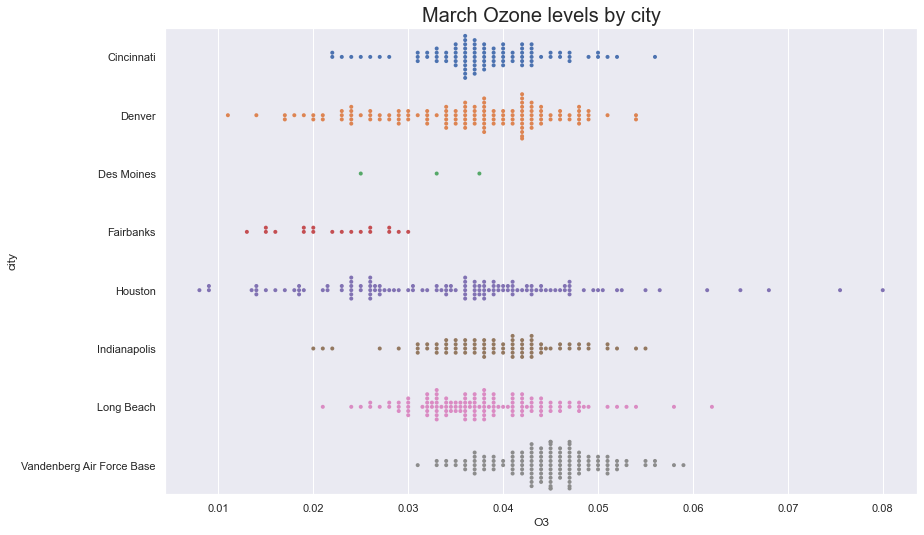

In [249]:
# let's focus on March 
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm
sns.swarmplot(y = "city",x = "O3", data = pollution_mar, size = 4)

# Set title
plt.title('March Ozone levels by city',fontsize = 20)

### Comparing Carbon Monoxide to NO2 Across All Cities

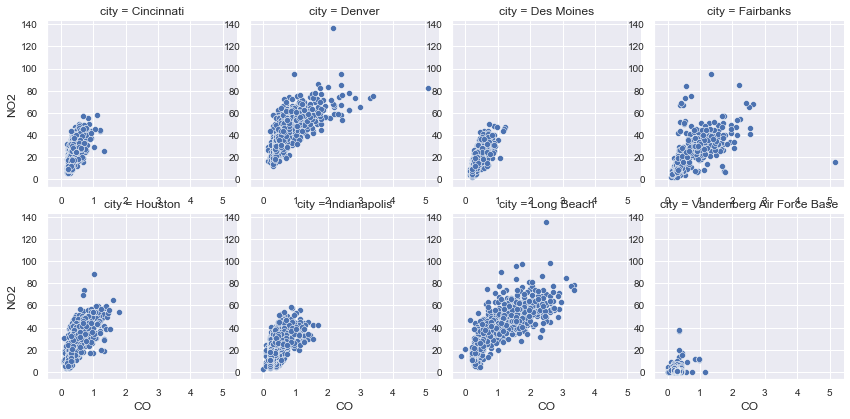

In [250]:
# Setup a facet grid to separate the cities
g = sns.FacetGrid(data = pollution,col = 'city',col_wrap = 4, sharey = True )

# Create separate city scatter plots
g.map(sns.scatterplot,'CO', 'NO2', alpha = 1)


# Show all grid labels
for axis in g.axes.flat:
    axis.tick_params(labelleft=True,labelbottom=True,labelsize = 10)

### Comparing O3 Across All Cities

<AxesSubplot:title={'center':'Ozone by City in October 2015'}, xlabel='days'>

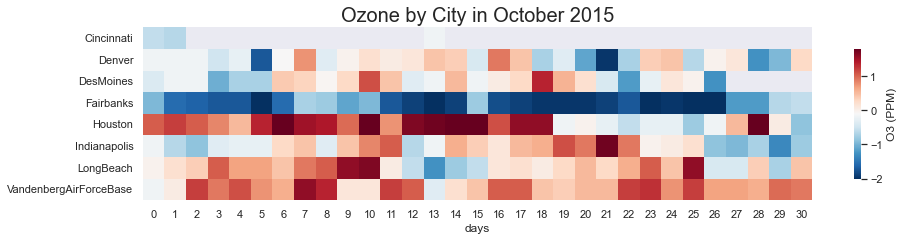

In [62]:
# Read csv data to pandas dataframe
oct_2015_O3 = pd.read_csv('C:\\Users\\Robert.Jones\\Documents\\Python_Projects\\data_visualization\\pollution_data\\oct_2015_O3.csv',index_col = 'days')
# Transpose data for heatmap purposes
oct_2015_O3 = oct_2015_O3.transpose()
# Set figure size
sns.set(rc= {'figure.figsize':(15,8)})
# Add title
plt.title("Ozone by City in October 2015",fontsize = 20)
# Plot heatmap
sns.heatmap(oct_2015_O3, robust=True, square=True,cmap='RdBu_r',cbar_kws={"shrink":.3, "label": "O3 (PPM)"})